# Week - 4 Assignment

## Protein-Water system

### 1. Finding the end-to-end distance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd
import itertools 

In [2]:
traj = md.load_xtc('./trajout.xtc', top='step5_9.gro')

In [3]:
def end_end(traj):
    """Compute the end to end distance of a trajectory"""
    # get the positions of the first and last atoms
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atoms
    dist = np.linalg.norm(first - last, axis=1)
    return dist

In [4]:
# compute the end to end distance
dist = end_end(traj)
print(dist)

[1.4593303  2.5117726  2.6785052  2.2828429  2.8735604  2.3681407
 2.7479453  3.0086823  3.7737515  3.5850093  3.697983   4.255209
 3.5528586  1.1764004  1.7152871  3.1113346  2.0354633  1.787128
 3.8024864  3.5075796  1.5494691  4.0937524  4.003799   4.121584
 3.8896794  3.0523474  3.786074   3.9060872  3.5364282  1.2907417
 2.4356968  1.8721596  3.298474   3.0334425  2.9120512  2.1295648
 1.6753263  2.898579   2.2902339  1.4070162  3.6766808  3.7564948
 1.6283646  3.600406   2.893629   2.2814941  2.316776   3.24078
 3.8517537  3.0063019  2.92584    2.749032   1.5511229  3.844465
 2.3985004  1.9601108  3.3806002  4.182108   3.2048163  2.0769982
 3.2418866  2.594884   2.366106   2.857796   3.0856807  3.6359832
 2.73899    4.0337515  1.8718402  2.9236133  4.114652   2.1641445
 3.3378847  0.98317194 4.3693333  2.9247499  1.7201481  1.9024376
 2.2289221  2.8887749  3.1349978  3.4708445  4.48325    3.1334574
 2.8230858  1.658449   1.3284802  0.7680507  0.8094851  1.9077998
 1.5363568  0.71

In [5]:
# print the mean and standard deviation
print('mean = ', np.mean(dist))
print('std = ', np.std(dist))

mean =  2.745316
std =  0.945995


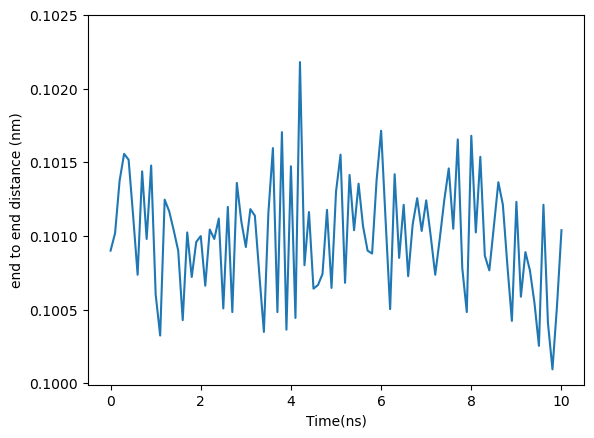

In [6]:
# plot the distribution
import matplotlib.pyplot as plt
dist = md.compute_distances(traj,[[0,1]])
plt.plot(traj.time/1000,dist)
plt.xlabel('Time(ns)')
plt.ylabel('end to end distance (nm)')
plt.yticks(np.arange(0.1,0.103,0.0005))
plt.yticks(np.arange(0.1,0.103,0.0005))
plt.savefig('../figures/end-end.png')

### 2. Plot of Radius of Gyration vs Time

In [7]:
r_o_gyr = md.compute_rg(traj)
print(r_o_gyr)

[2.05270294 2.05113567 2.04966705 2.0568136  2.06090969 2.05327325
 2.05717867 2.05252068 2.06218274 2.04966651 2.0547669  2.04706457
 2.05342333 2.05662257 2.04908989 2.05354777 2.04697664 2.06142134
 2.05615137 2.0567608  2.06061908 2.05386315 2.04648403 2.05360654
 2.05680189 2.05829518 2.04998606 2.06174415 2.05834813 2.05367508
 2.04880798 2.06210467 2.04837778 2.05866029 2.05523515 2.04961511
 2.05050002 2.05624774 2.05934663 2.05073181 2.0442558  2.05978717
 2.0462142  2.0555986  2.05214589 2.05152879 2.04688173 2.0569766
 2.05427107 2.05843011 2.05397351 2.04856743 2.05289066 2.05562453
 2.05314998 2.06080965 2.05200422 2.05348529 2.04540559 2.05010692
 2.04570885 2.05063545 2.05109144 2.05885207 2.04958552 2.0614861
 2.05395567 2.05275589 2.05654111 2.05891354 2.05246848 2.05528365
 2.05744512 2.05588279 2.0504262  2.05555305 2.0526902  2.04748502
 2.05218579 2.06093128 2.05263484 2.05693495 2.05128906 2.05493715
 2.0590284  2.06222213 2.04847518 2.05253797 2.05982526 2.056126

In [8]:
print('mean = ', np.mean(r_o_gyr))
print('std = ', np.std(r_o_gyr))

mean =  2.0540116089334792
std =  0.004481014015665042


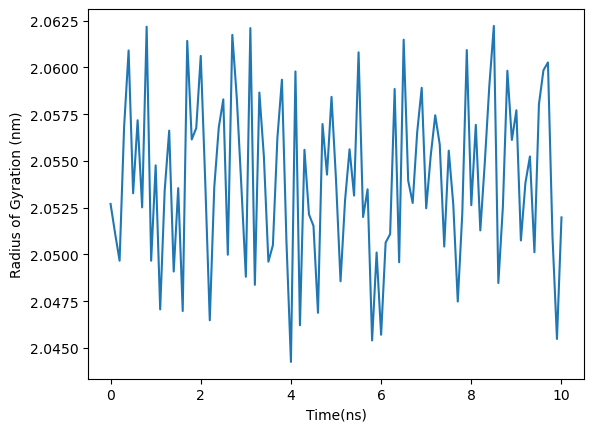

In [9]:
plt.plot(traj.time/1000,r_o_gyr)
plt.xlabel('Time(ns)')
plt.ylabel('Radius of Gyration (nm)')
plt.savefig('../figures/gyration.png')